In [70]:
import matplotlib.pyplot as plt                  
import pandas as pd
import numpy as np
import configparser
import json
from ast import literal_eval

In [102]:
width_deg = 30
decmax = 45
cutouts = int(2*decmax/width_deg*(360/width_deg))

In [103]:
# map source, 'Colin' or 'websky'
map_source = 'Colin'
# ksz type, 'lt' or 'ri'
ksz_type = 'lt'
if ksz_type == 'lt':
    ksz_name = 'late-time'
else:
    ksz_name = 'reionization'
legend = ['Planck_SMICA', 'CMB_S3', 'CMB_S4']

In [106]:
data_path = 'output/data'+ str(cutouts) + '/'
plot_path = 'output/plots'+ str(cutouts) + '/' 
plot_name =f'{map_source}_{ksz_type}_auto_bias.png'
lmin = 30
#lmaxs = [4000]
lmaxs = [3000, 4000]
#lmaxs = [3000, 4000, 4500]
ylim = [-0.1, 0.1]
# experiments = ['CMB_S4']
#experiments = ['CMB_S4', 'reference']
#experiments = ['Planck_SMICA', 'CMB_S3']
#experiments = ['Planck_SMICA', 'CMB_S3','CMB_S4']
experiments = ['Planck_SMICA', 'CMB_S3', 'CMB_S4', 'reference']
row, column = np.size(experiments), np.size(lmaxs)

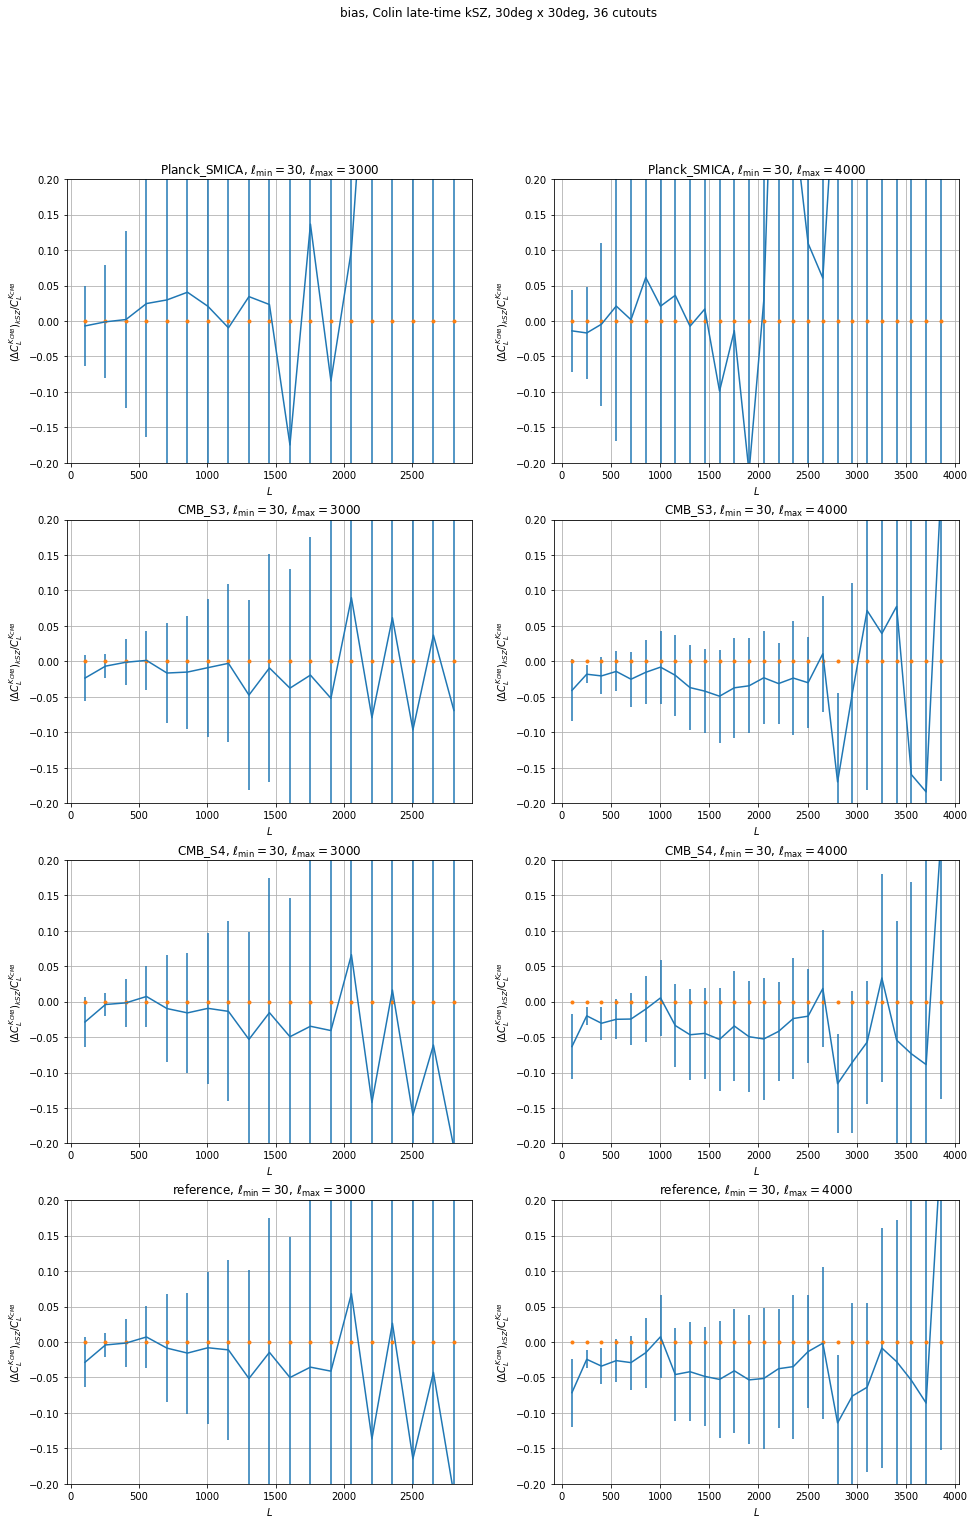

In [107]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
fig.suptitle('bias, %s %s kSZ, %sdeg x %sdeg, %s cutouts' %(map_source, ksz_name, width_deg, width_deg, str(cutouts)))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        #ax[i,j].plot(Data['Ls'], Data['bias'])
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err'])
        ax[i,j].plot(Data['Ls'], np.zeros(np.shape(Data['Ls'])), '.')
        #ax[i,j].plot(Data['Ls'], np.zeros(np.shape(Data['Ls'])))
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        #ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim([-0.2, 0.2])
        ax[i,j].grid()
plt.savefig(plot_path + map_source + '_'+ksz_type+'_bias.png')

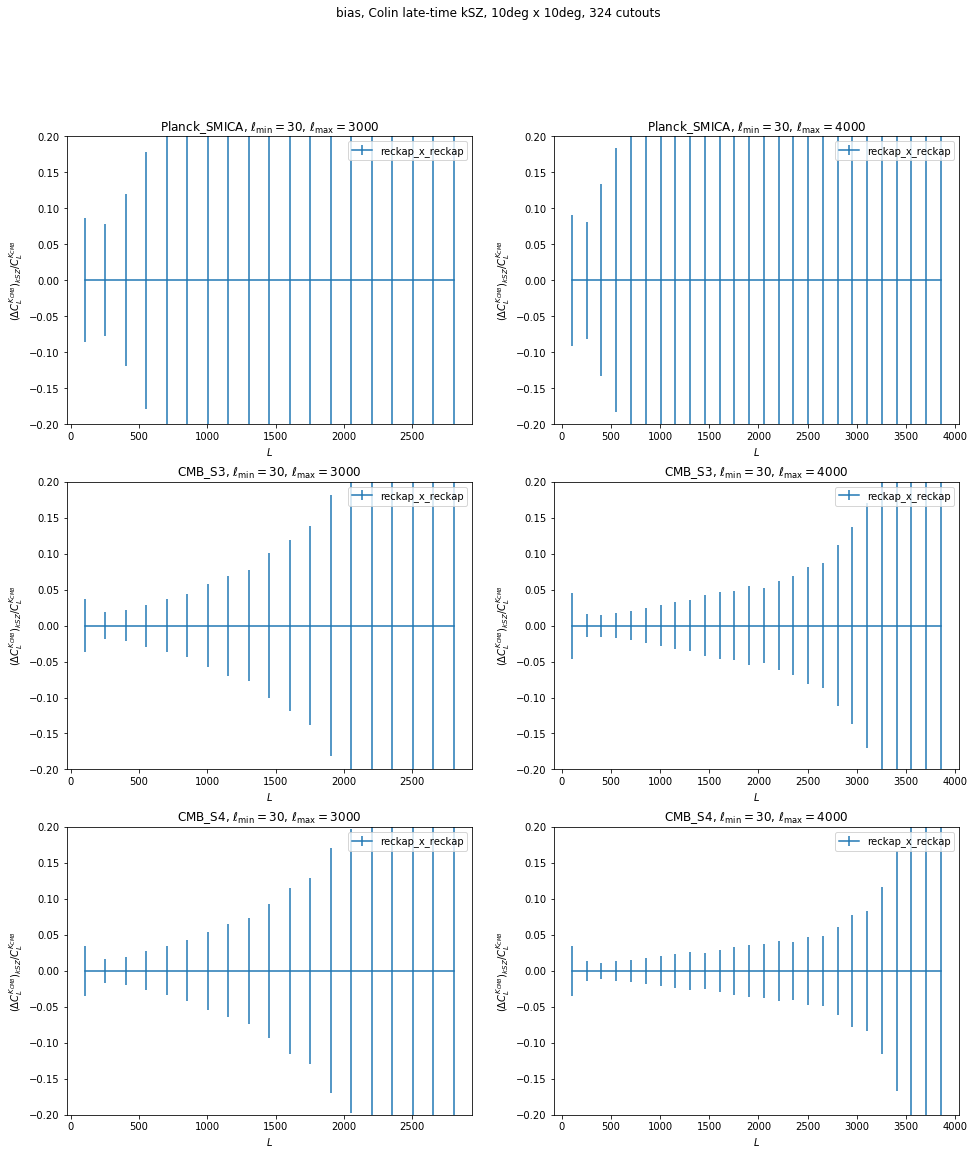

In [99]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
fig.suptitle('bias, %s %s kSZ, %sdeg x %sdeg, %s cutouts' %(map_source, ksz_name, width_deg, width_deg, str(cutouts)))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err']/Data['inkap_x_inkap'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].legend([ 'reckap_x_reckap','inkap_x_inkap', 'inkap_x_reckap'])
        ax[i,j].set_ylim([-0.2, 0.2])
#plt.savefig(plot_path + map_source + '_'+ksz_type+'_ps.png')ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['bias_err'])

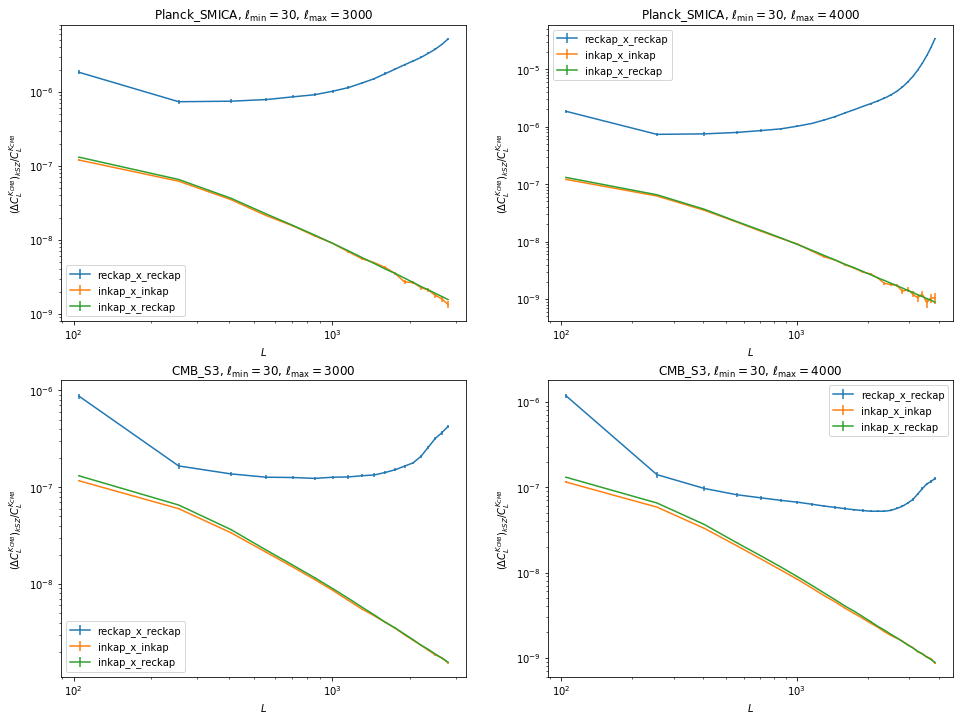

In [61]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['reckap_x_reckap'], yerr=10*Data['reckap_x_reckap_err'])
        ax[i,j].errorbar(Data['Ls'], Data['inkap_x_reckap'], yerr=Data['inkap_x_reckap_err'])
        ax[i,j].errorbar(Data['Ls'], Data['inkap_x_inkap'], yerr=Data['inkap_x_inkap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].legend([ 'reckap_x_reckap','inkap_x_inkap', 'inkap_x_reckap'])
        ax[i,j].loglog()
#plt.savefig(plot_path + map_source + '_'+ksz_type+'_ps.png')

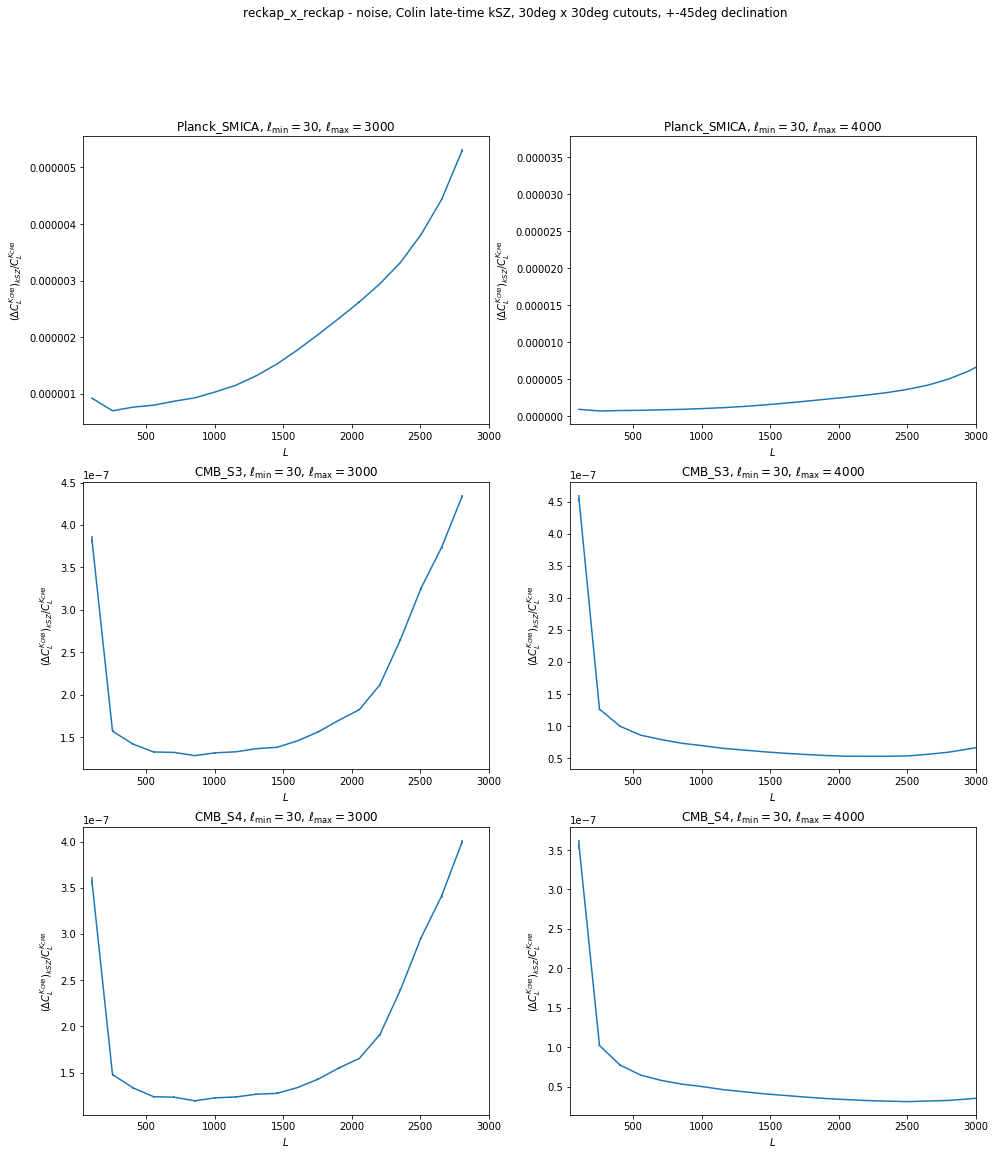

In [16]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
fig.suptitle('reckap_x_reckap - noise, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['reckap_x_reckap'], yerr=Data['reckap_x_reckap_err'])
        # ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].set_xlim([40,3000])
        #ax[i,j].set_ylim([-1e-7,4e-7])
# plt.savefig(plot_path + 'reckap_x_reckap-noise.png')

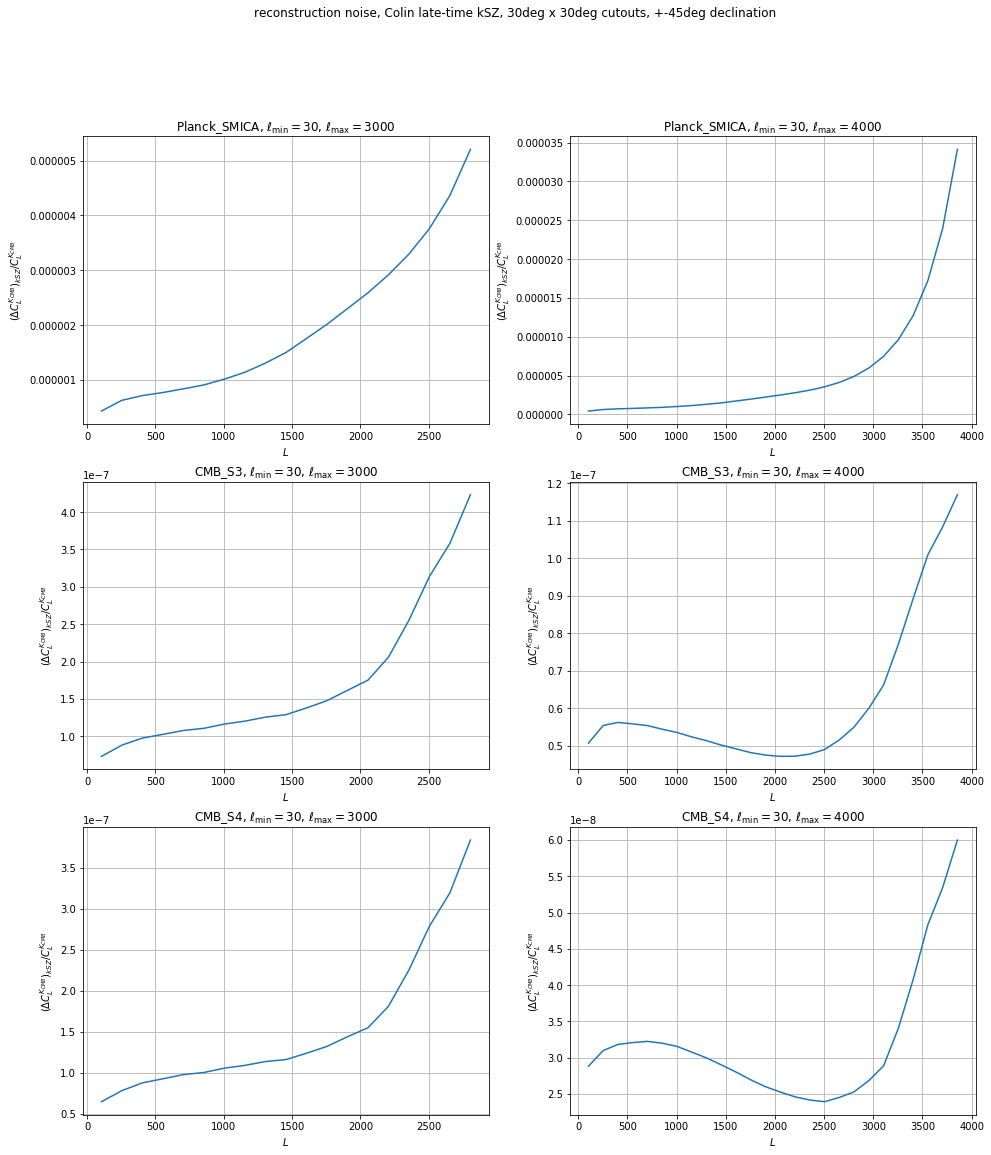

In [7]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
fig.suptitle('reconstruction noise, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].plot(Data['Ls'], Data['noise'])
        # ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].grid()
        #ax[i,j].set_xlim([40,3000])
        #ax[i,j].set_ylim([-1e-7,4e-7])

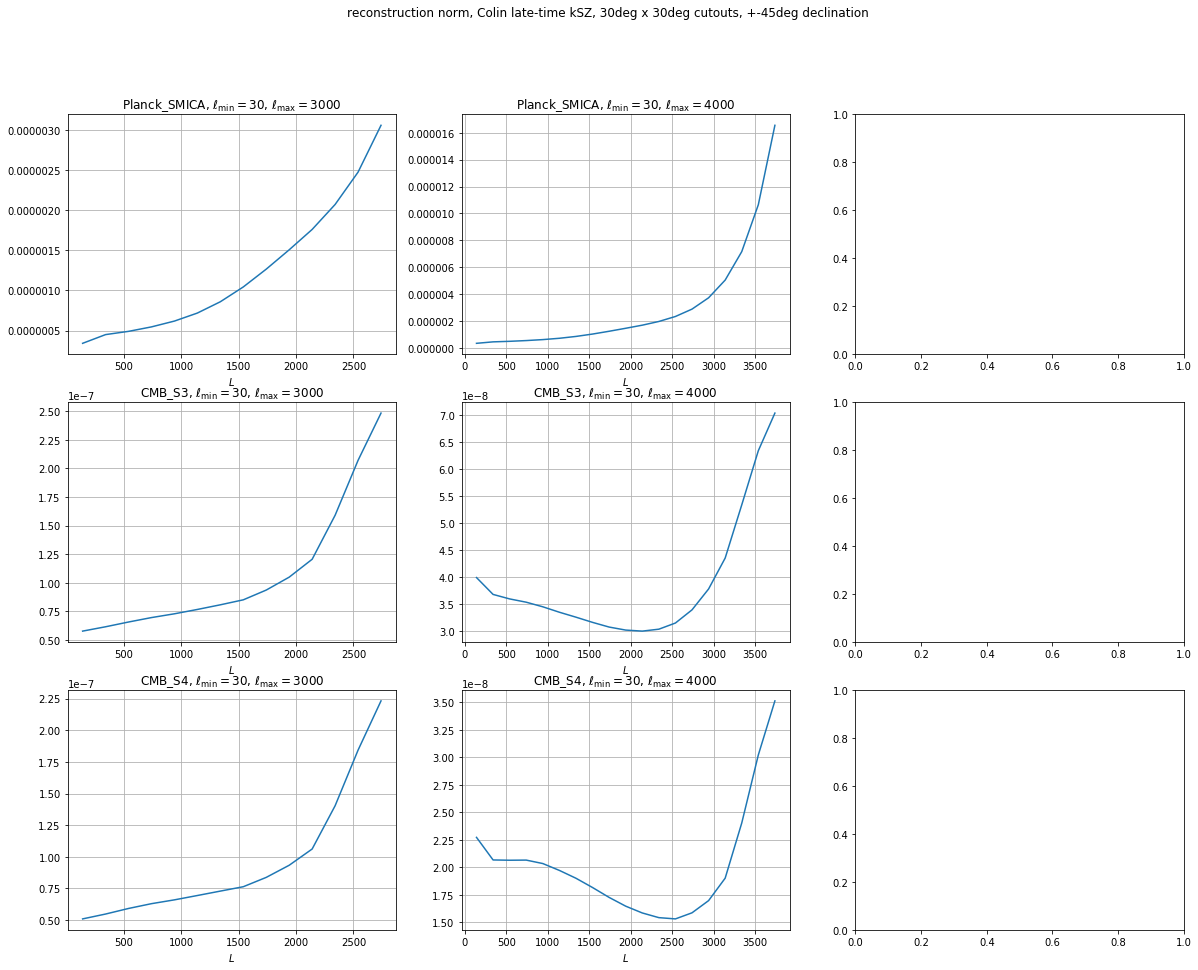

In [16]:
fig, ax = plt.subplots(3,3,figsize=(20,15))
fig.suptitle('reconstruction norm, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        Ls = Data['Ls']
        factor =  Ls*(Ls+1)/(2*np.pi)
        ax[i,j].plot(Data['Ls'],  factor*Data['norm'])
        # ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        # ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].grid()

/global/homes/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


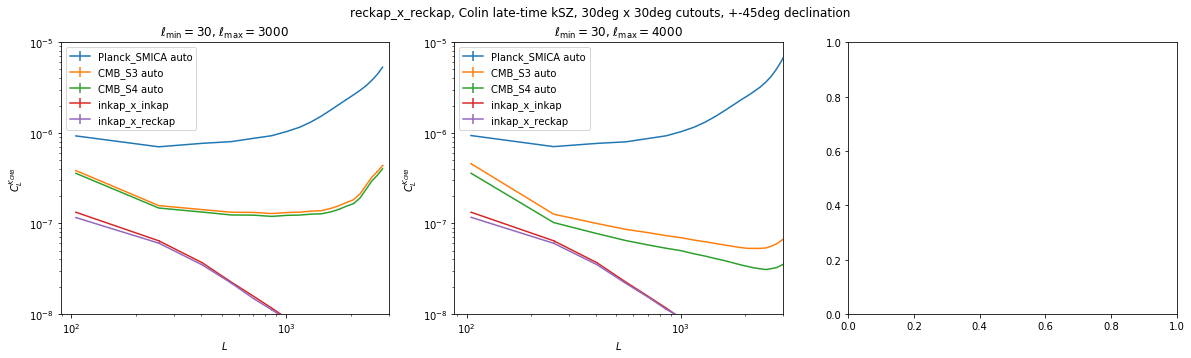

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('reckap_x_reckap, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for j in range(column):
    Data_planck = pd.read_csv(data_path + '%s_%s_Planck_SMICA_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    Data_cmbs3 = pd.read_csv(data_path + '%s_%s_CMB_S3_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    Data_cmbs4 = pd.read_csv(data_path + '%s_%s_CMB_S4_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    ax[j].set_title(r'${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(lmin, lmaxs[j]))
    ax[j].errorbar(Data_planck['Ls'], Data_planck['reckap_x_reckap'], yerr=Data_planck['reckap_x_reckap_err'])
    ax[j].errorbar(Data_cmbs3['Ls'], Data_cmbs3['reckap_x_reckap'], yerr=Data_cmbs3['reckap_x_reckap_err'])
    ax[j].errorbar(Data_cmbs4['Ls'], Data_cmbs4['reckap_x_reckap'], yerr=Data_cmbs4['reckap_x_reckap_err'])
    ax[j].errorbar(Data_planck['Ls'], Data_planck['inkap_x_inkap'], yerr=Data_planck['inkap_x_inkap_err'])
    ax[j].errorbar(Data_planck['Ls'], Data_planck['inkap_x_reckap'], yerr=Data_planck['inkap_x_reckap_err'])
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].legend( ['Planck_SMICA auto', 'CMB_S3 auto', 'CMB_S4 auto', 'inkap_x_inkap', 'inkap_x_reckap'])
    ax[j].set_xlabel('$L$')                                                                        
    ax[j].set_ylabel('$C_L^{K_{CMB}}$')      
    ax[j].set_xlim([0,3000])
    ax[j].set_ylim(1e-8, 1e-5)
plt.savefig(plot_path + map_source + '_'+ksz_type+'_reckap_x_reckap.png')

/global/homes/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


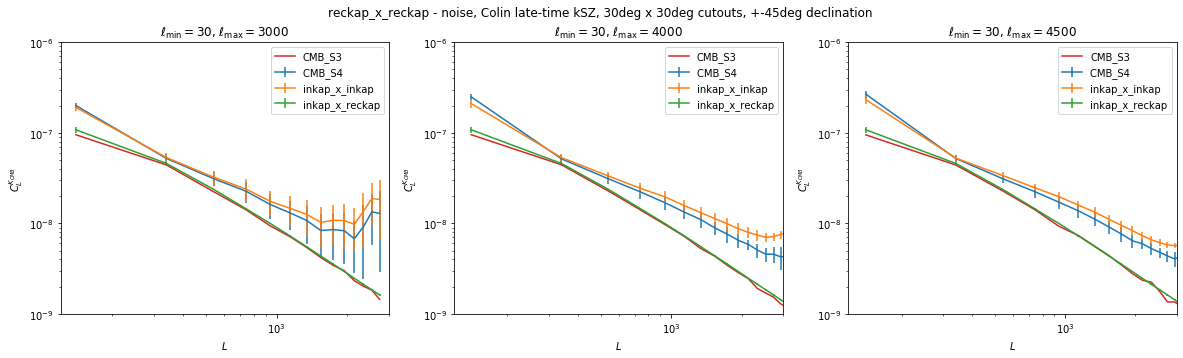

In [26]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('reckap_x_reckap - noise, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
Err = 1
for j in range(column):
    Data_planck = pd.read_csv(data_path + '%s_%s_Planck_SMICA_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    Data_cmbs3 = pd.read_csv(data_path + '%s_%s_CMB_S3_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    Data_cmbs4 = pd.read_csv(data_path + '%s_%s_CMB_S4_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    ax[j].set_title(r'${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(lmin, lmaxs[j]))
    if Err:
        # ax[j].errorbar(Data_planck['Ls'], Data_planck['reckap_x_reckap']-Data_planck['noise'], yerr=Data_planck['reckap_x_reckap_err'])
        ax[j].errorbar(Data_cmbs3['Ls'], Data_cmbs3['reckap_x_reckap']-Data_cmbs3['noise'], yerr=Data_cmbs3['reckap_x_reckap_err'])
        ax[j].errorbar(Data_cmbs4['Ls'], Data_cmbs4['reckap_x_reckap']-Data_cmbs4['noise'], yerr=Data_cmbs4['reckap_x_reckap_err'])
        ax[j].errorbar(Data_planck['Ls'], Data_planck['inkap_x_inkap'], yerr=Data_planck['inkap_x_inkap_err'])
        ax[j].plot(Data_planck['Ls'], Data_planck['inkap_x_reckap'])
    else:
        ax[j].plot(Data_planck['Ls'], Data_planck['reckap_x_reckap']-Data_planck['noise'])
        ax[j].plot(Data_cmbs3['Ls'], Data_cmbs3['reckap_x_reckap']-Data_cmbs3['noise'])
        ax[j].plot(Data_cmbs4['Ls'], Data_cmbs4['reckap_x_reckap']-Data_cmbs4['noise'])
        ax[j].plot(Data_planck['Ls'], Data_planck['inkap_x_inkap'])
        ax[j].plot(Data_planck['Ls'], Data_planck['inkap_x_reckap'])
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].legend( [ 'CMB_S3' , 'CMB_S4 ', 'inkap_x_inkap', 'inkap_x_reckap'])
    ax[j].set_xlabel('$L$')                                                                        
    ax[j].set_ylabel('$C_L^{K_{CMB}}$')      
    ax[j].set_xlim([0,3000])
    ax[j].set_ylim(1e-9, 1e-6)
plt.savefig(plot_path + map_source +'_'+ksz_type+ '_reckap_x_reckap-noise.png')

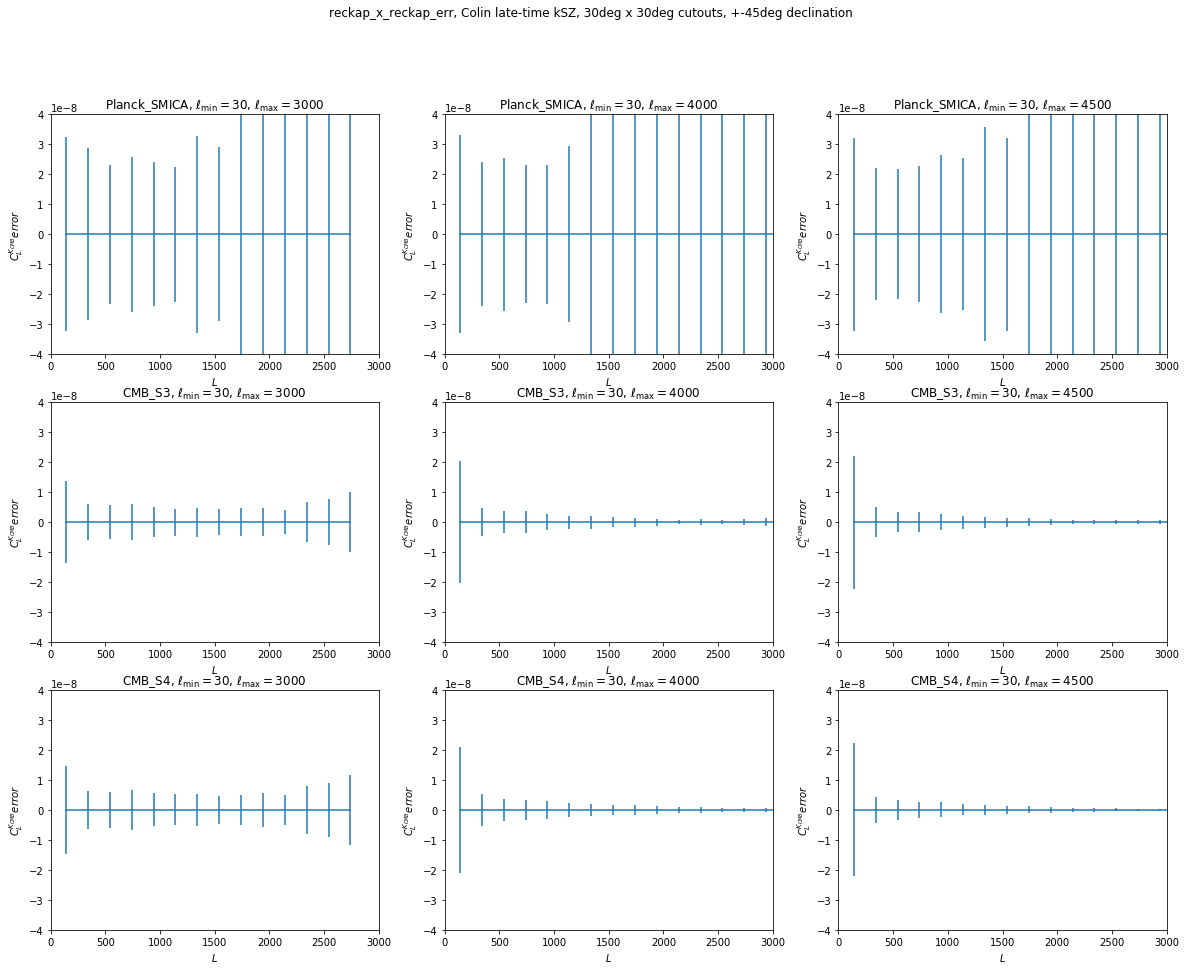

In [27]:
fig, ax = plt.subplots(3,3,figsize=(20,15))
fig.suptitle('reckap_x_reckap_err, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        # ax[i,j].plot(Data['Ls'], Data['bias'])
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$C_L^{K_{CMB}} error$')      
        ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim([-4e-8, 4e-8])
plt.savefig(plot_path + map_source +'_'+ksz_type+ '_reckap_x_reckap_err')

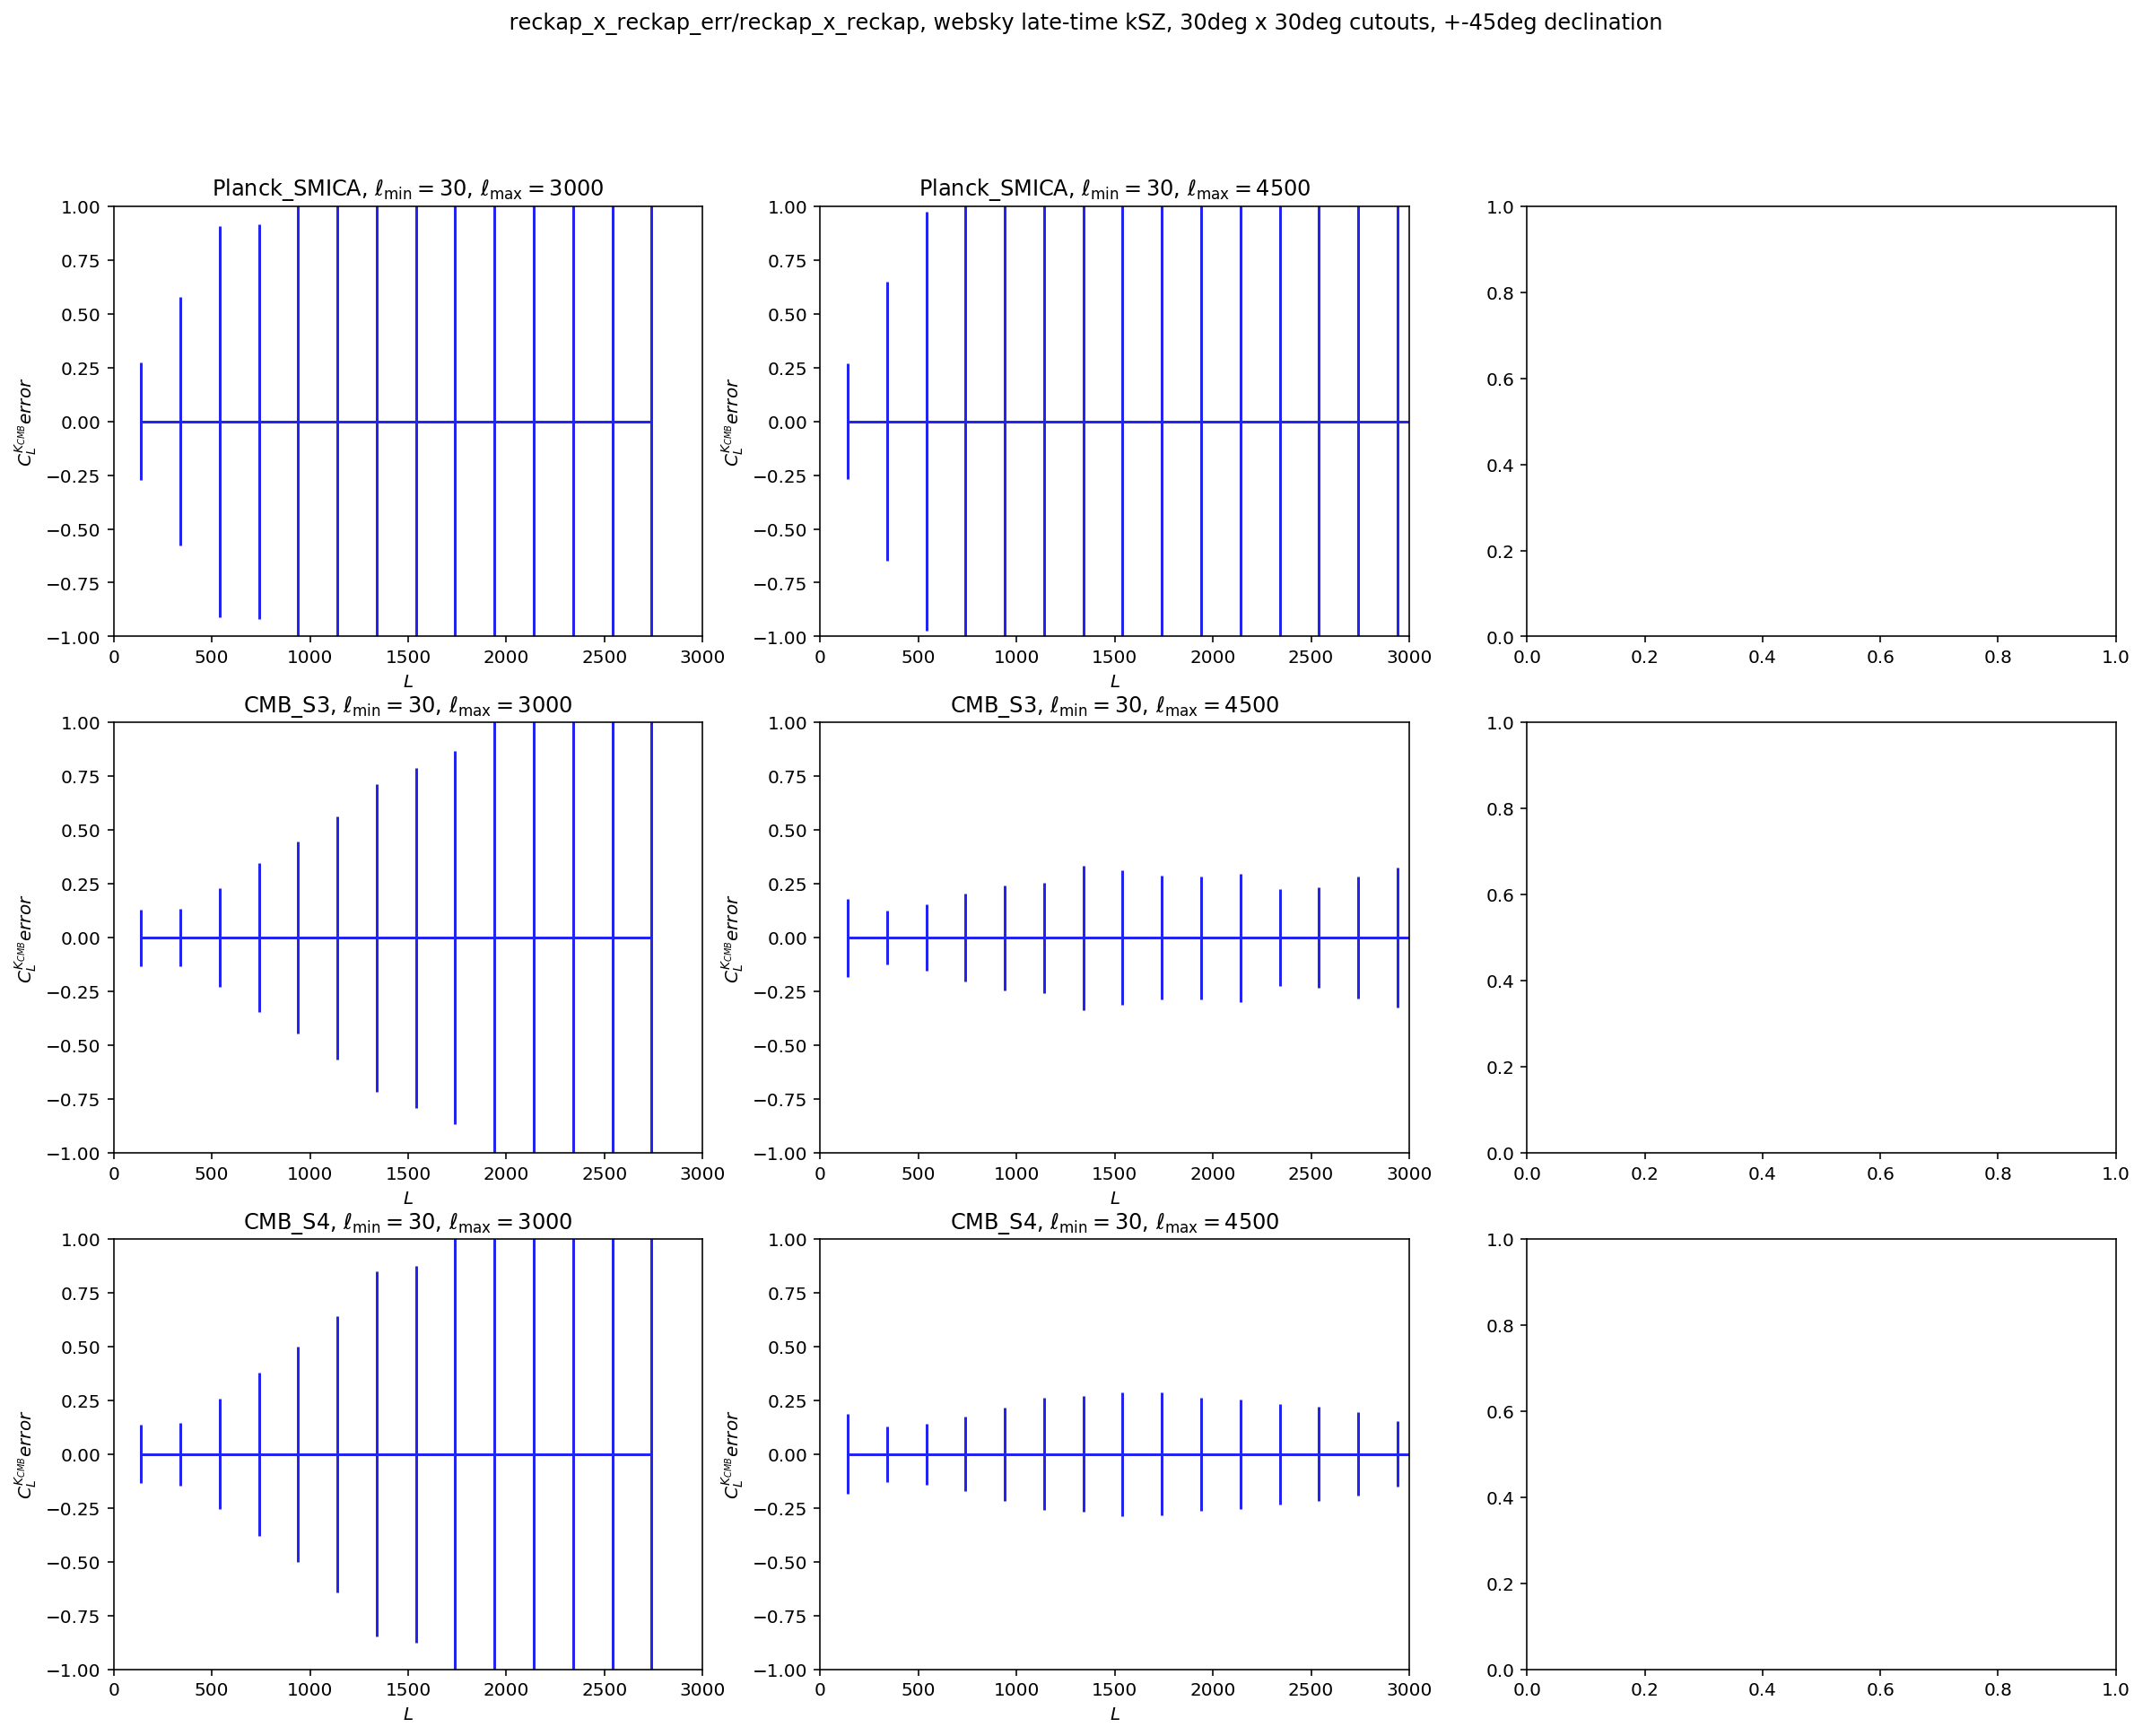

In [119]:
fig, ax = plt.subplots(3,3,figsize=(20,15))
fig.suptitle(' reckap_x_reckap_err/reckap_x_reckap, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        # ax[i,j].plot(Data['Ls'], Data['bias'])
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err']/Data['inkap_x_inkap'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$C_L^{K_{CMB}} error$')      
        ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim([-1, 1])

In [120]:
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.0 installed at /global/homes/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/camb


In [121]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [122]:
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl=True)
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2551, 4)


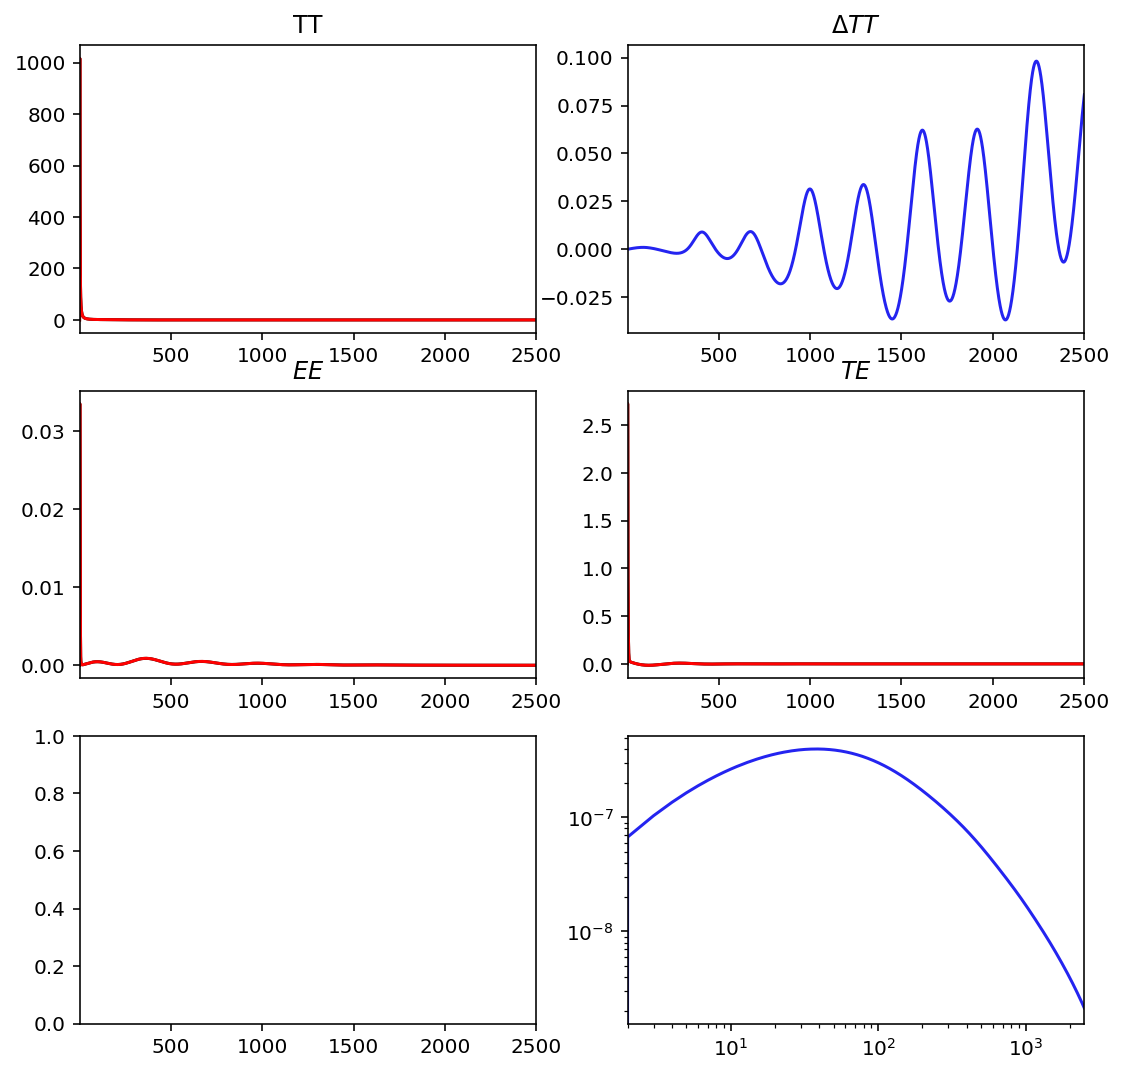

In [123]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
lens_potential_cls=powers['lens_potential']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(3,2, figsize = (9,9))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$')
ax[2,1].plot(ls, 1/2*ls**4*lens_potential_cls[:,0])
ax[2,1].set_xscale('log')
ax[2,1].set_yscale('log')
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

In [124]:
from orphics import io, maps, lensing, cosmology, stats
from pixell import enmap, curvedsky

In [125]:
kap_alm = hp.read_alm(map_path + 'kappa_alm.fits')
inkappa_cls = hp.alm2cl(kap_alm)

/global/homes/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


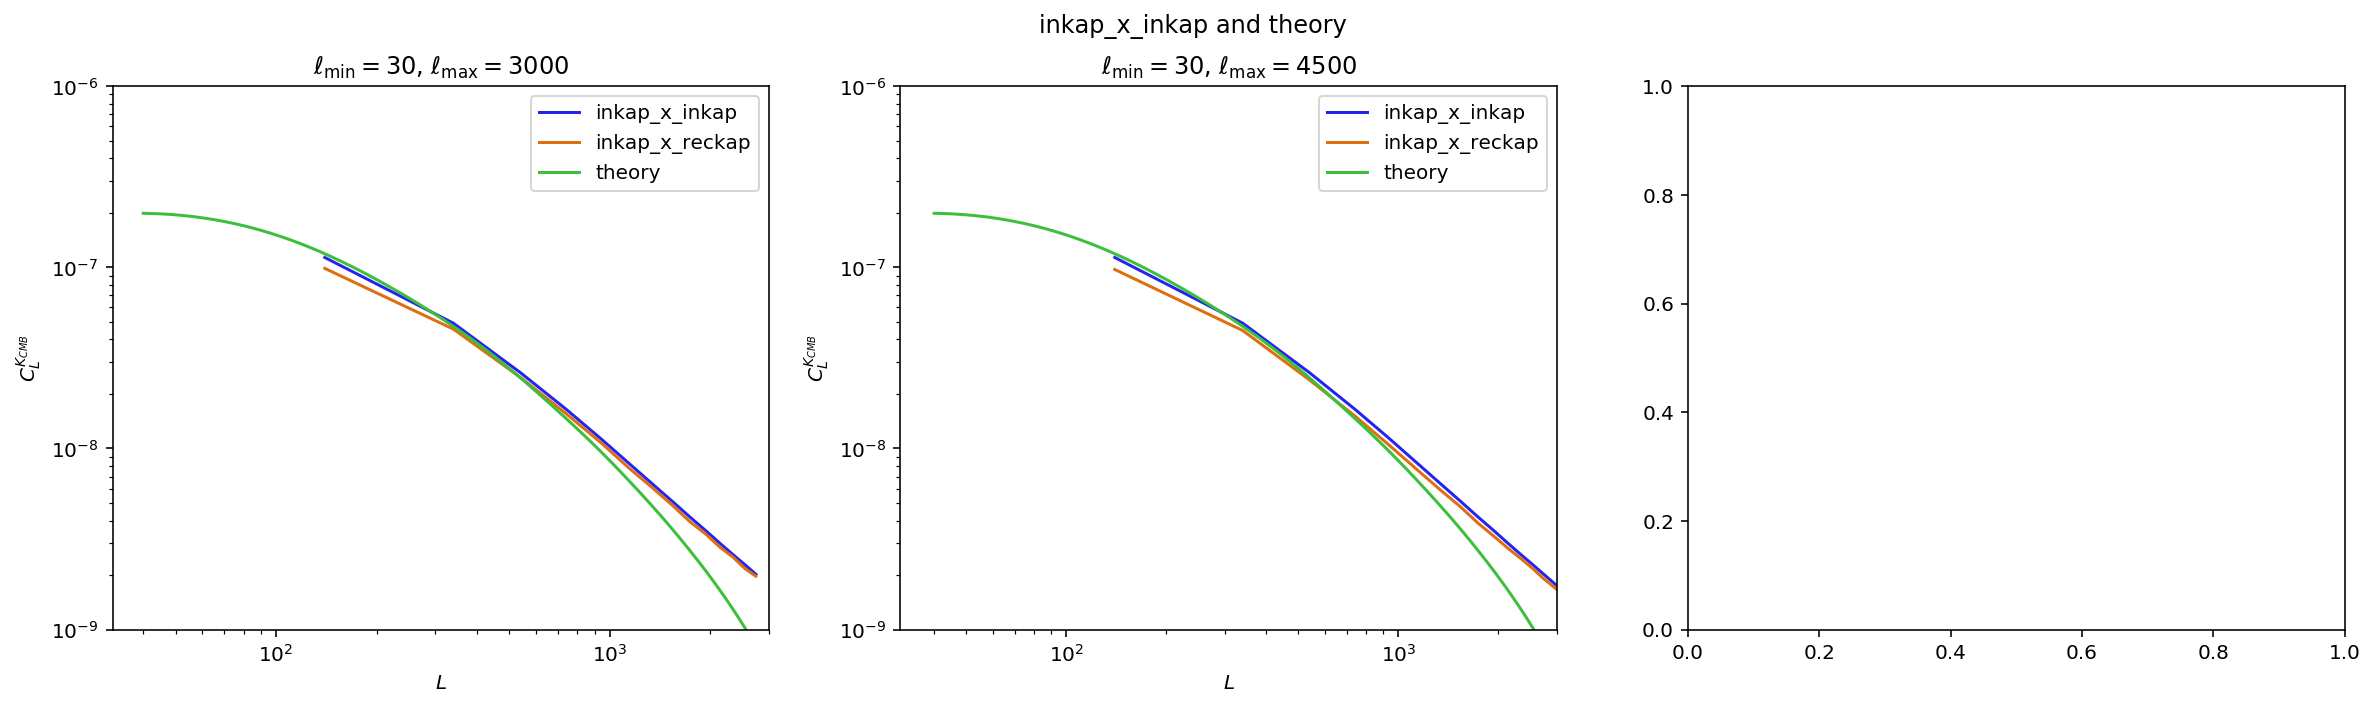

In [126]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('inkap_x_inkap and theory')
for j in range(column):
    Data_planck = pd.read_csv(data_path + '%s_%s_Planck_SMICA_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    Data_cmbs3 = pd.read_csv(data_path + '%s_%s_CMB_S3_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    Data_cmbs4 = pd.read_csv(data_path + '%s_%s_CMB_S4_%s_%s.csv' %(map_source, ksz_type, lmin, lmaxs[j]))
    ax[j].set_title(r'${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(lmin, lmaxs[j]))
    ax[j].plot(Data_planck['Ls'], Data_cmbs3['inkap_x_inkap'])
    ax[j].plot(Data_planck['Ls'], Data_cmbs3['inkap_x_reckap'])
    ax[j].plot(ls[40:], 1/4*ls[40:]**4*lens_potential_cls[40:,0])
    #ax[j].plot(inkappa_cls)
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].legend( ['inkap_x_inkap', 'inkap_x_reckap','theory', 'fullsky_kappa_cls'])
    ax[j].set_xlabel('$L$')                                                                        
    ax[j].set_ylabel('$C_L^{K_{CMB}}$')      
    ax[j].set_xlim([0,3000])
    ax[j].set_ylim(1e-9, 1e-6)
plt.savefig(plot_path +map_source+ '_'+ksz_type+'theory.png')